# Layered Grammar of Graphics

Data visualization has always been a very important part of statistics. It gives statisticians a way to share their findings with others in a concise and relatively easy to understand way. Given the fact that R is a programming language built by statisticians for statisticians, the R community has made a considerable effort to ensure that R users are able to effectively create visualizations to help them tell their data stories.

Arguably the most popular R package for data visualization is the ggplot2 package. This package was created by Hadley Wickham and is based on the concept of the layered grammar of graphics. The layered grammar of graphics defines a plot in the following way:

- A default dataset and a set of mappings from variables to aesthetics
- One or more layers, each composed of a geometric object, a statistical transformation, a position adjustment, and optionally a dataset and aesthetic mappings.
- One scale for each aesthetic mapping
- A coordinate system
- The faceting specification  

The above is an explanation of the layered grammar of graphics from the Author of the ***ggplot2*** package, Hadley Wickham. You will learn how to use the above concepts to build beautiful visualizations using the ***ggplot2***.

In [1]:
library("tidyverse")
library("lubridate")
library("scales")
library("ggthemes")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Creating scatter plots in R with ggplot2

The scatter plot is a very popular visual in data analytics. It is used to to plot a metric based on two categories. Below is a code snippet that illustrates how to create a scatter plot using ***ggplot2***

In [2]:
options(repr.plot.width=15, repr.plot.height=8)
plot.data <-
    diamonds %>%
    filter(color == "D") %>%
    sample_n(200)
head(plot.data)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.18,Ideal,D,SI1,61.9,55,7216,6.80,6.76,4.20
0.72,Ideal,D,VS1,62.3,54,3622,5.74,5.79,3.59
1.01,Premium,D,VS2,61.0,59,6827,6.44,6.41,3.92
0.30,Ideal,D,VS2,62.3,56,790,4.31,4.29,2.68
1.01,Good,D,VS2,64.1,57,4466,6.32,6.22,4.02
0.41,Very Good,D,SI1,60.3,63,920,4.80,4.78,2.89


Initiate ***ggplot()*** function

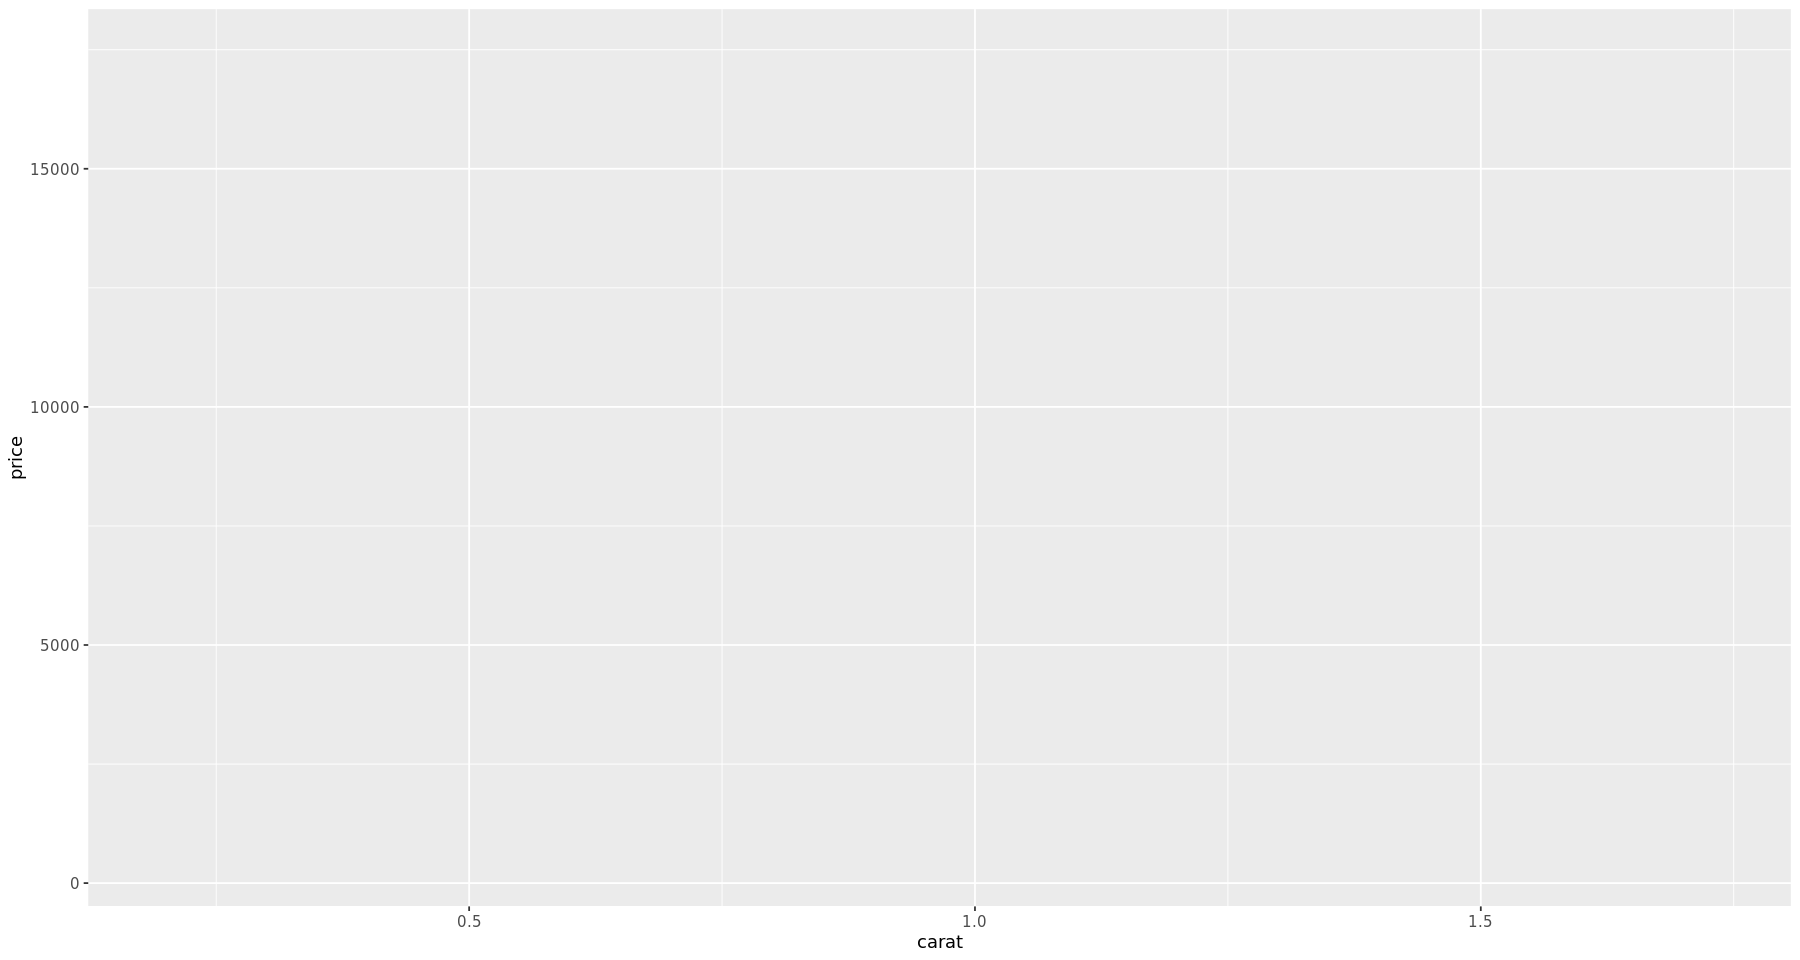

In [3]:
ggplot(data = plot.data, mapping = aes(x = carat, y = price))

The code below create a scatter plot using the ***geom_point()*** geom. Geoms are the geometric object you are plotting. Examples of common geoms are ***geom_bar()*** for bar charts and ***geom_line()*** for line charts.

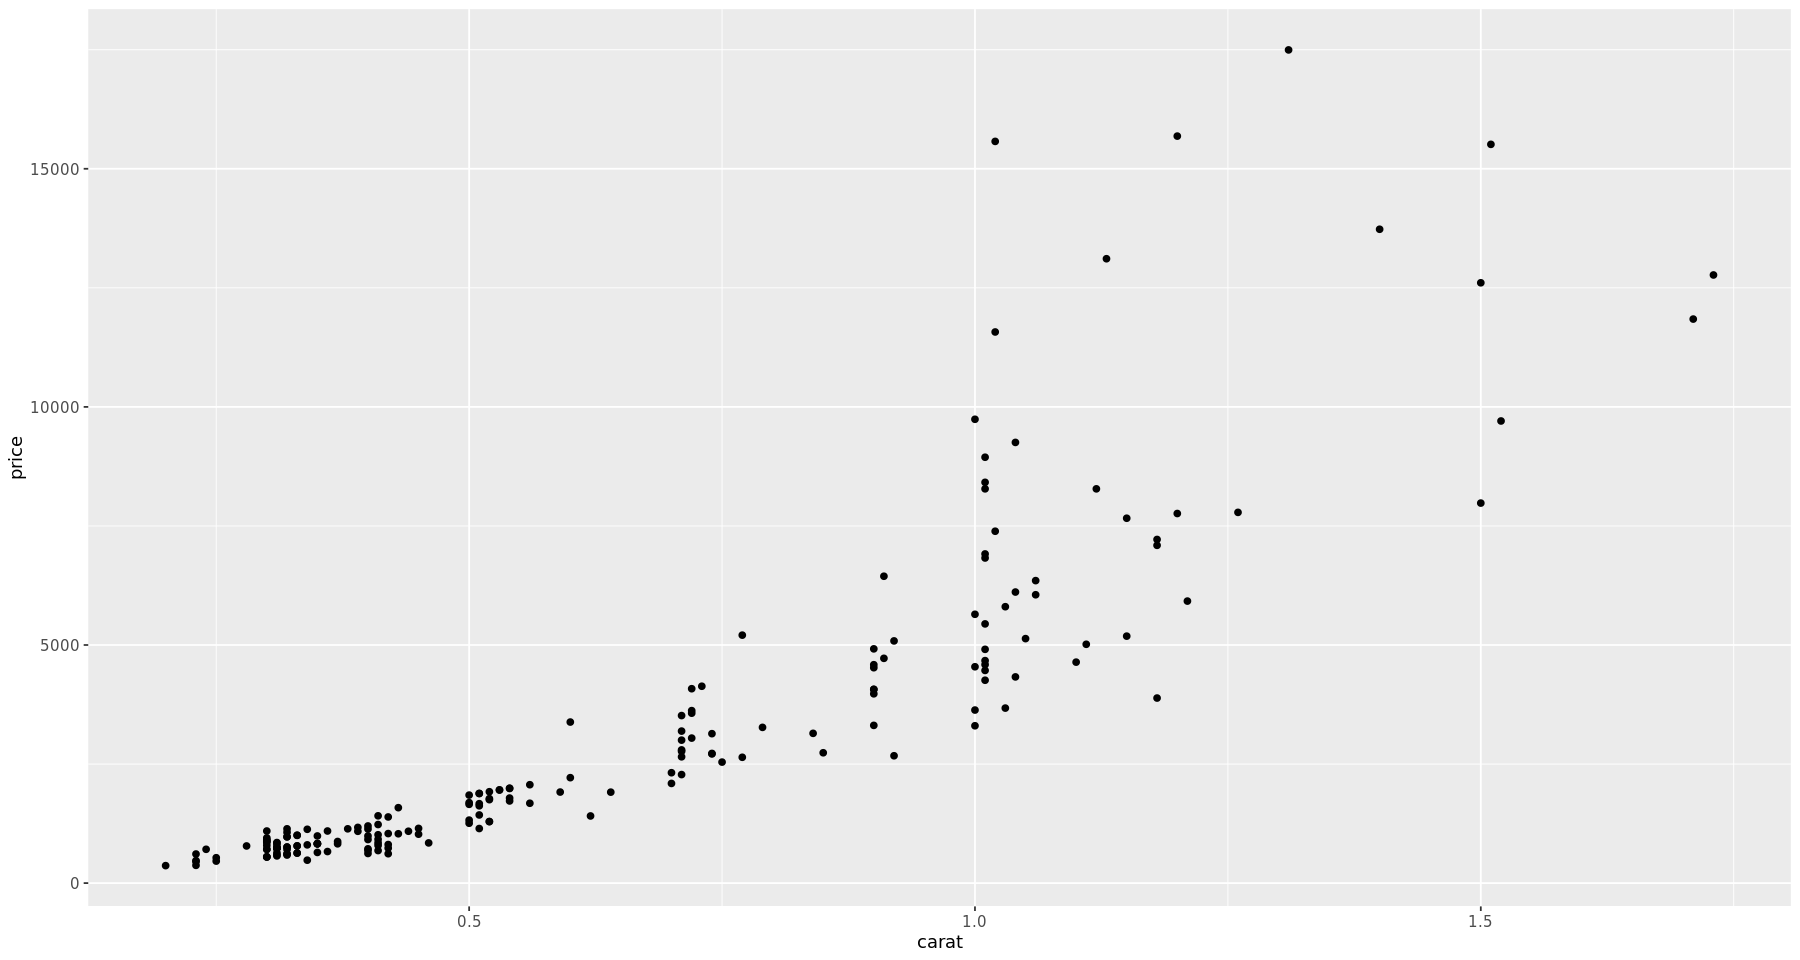

In [4]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = plot.data, mapping = aes(x = carat, y = price)) +
    geom_point()

# Shapes you can use with ***geom_point()***

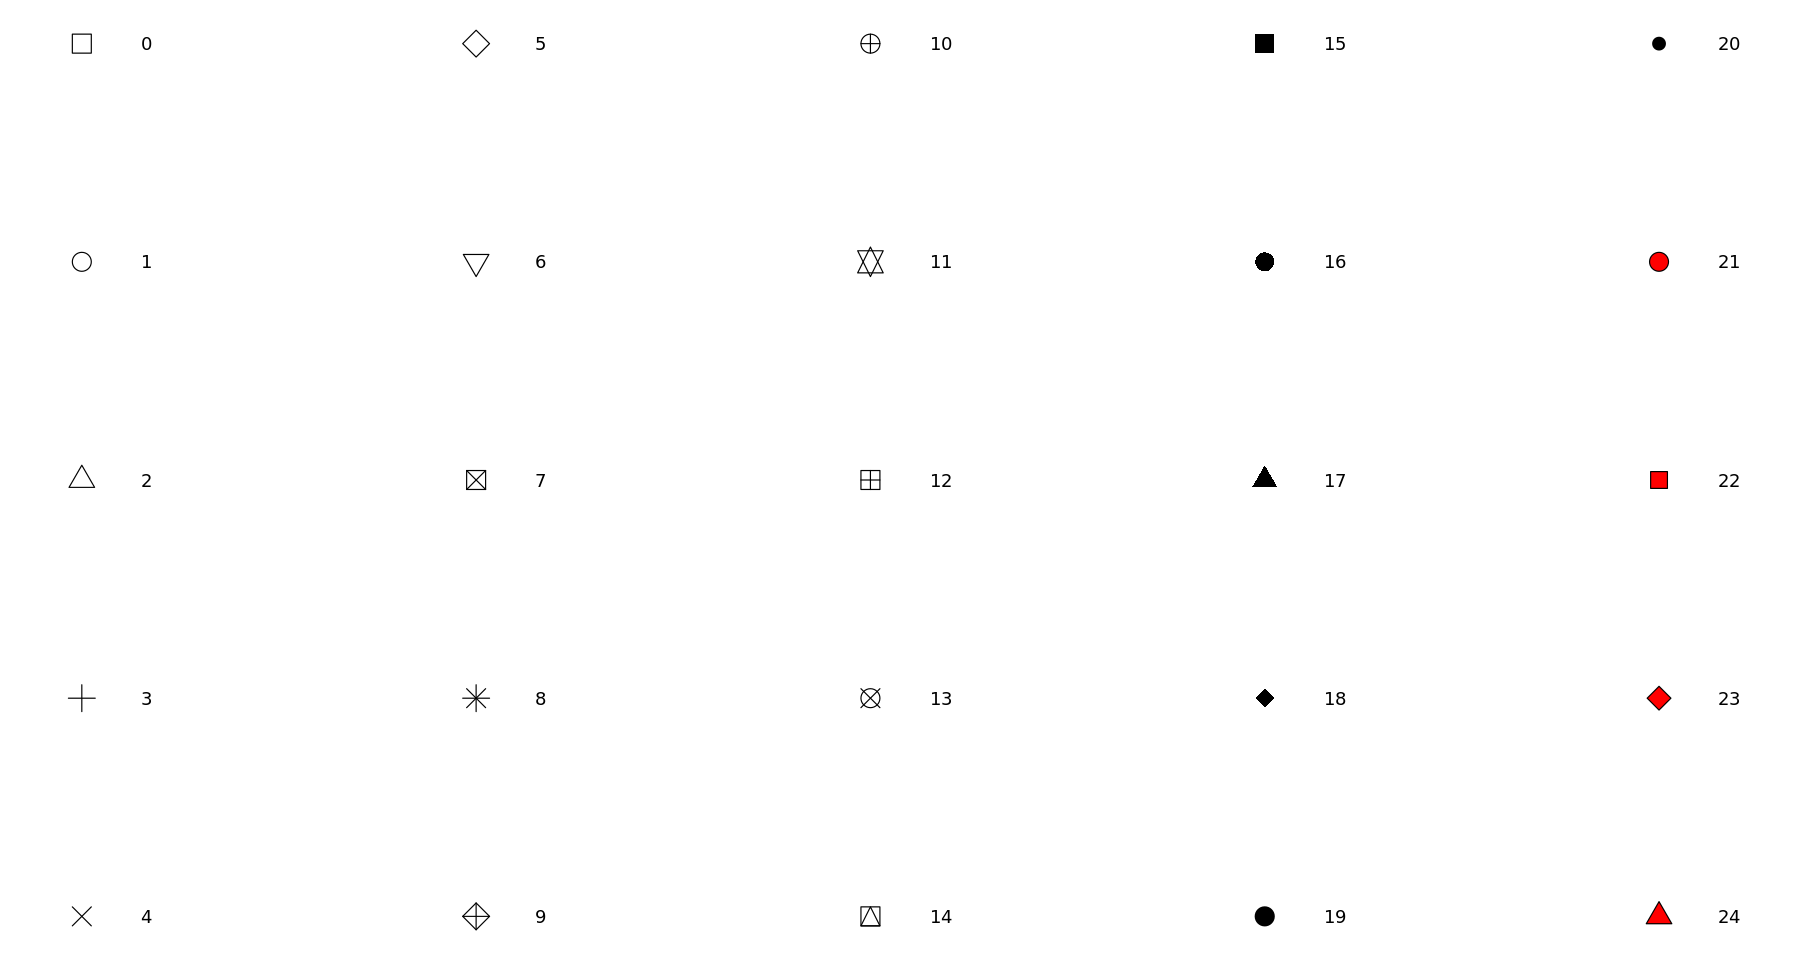

In [5]:
options(repr.plot.width=15, repr.plot.height=8)
shapes <- data.frame(
  shape = c(0:24),
  x = 0:24 %/% 5,
  y = -(0:24 %% 5)
)
ggplot(shapes, aes(x, y)) + 
  geom_point(aes(shape = shape), size = 5, fill = "red") +
  geom_text(aes(label = shape), hjust = 0, nudge_x = 0.15) +
  scale_shape_identity() +
  expand_limits(x = 4.1) +
  theme_void()

Using a diamond shape instead of solid cirles with ***geom_point()***

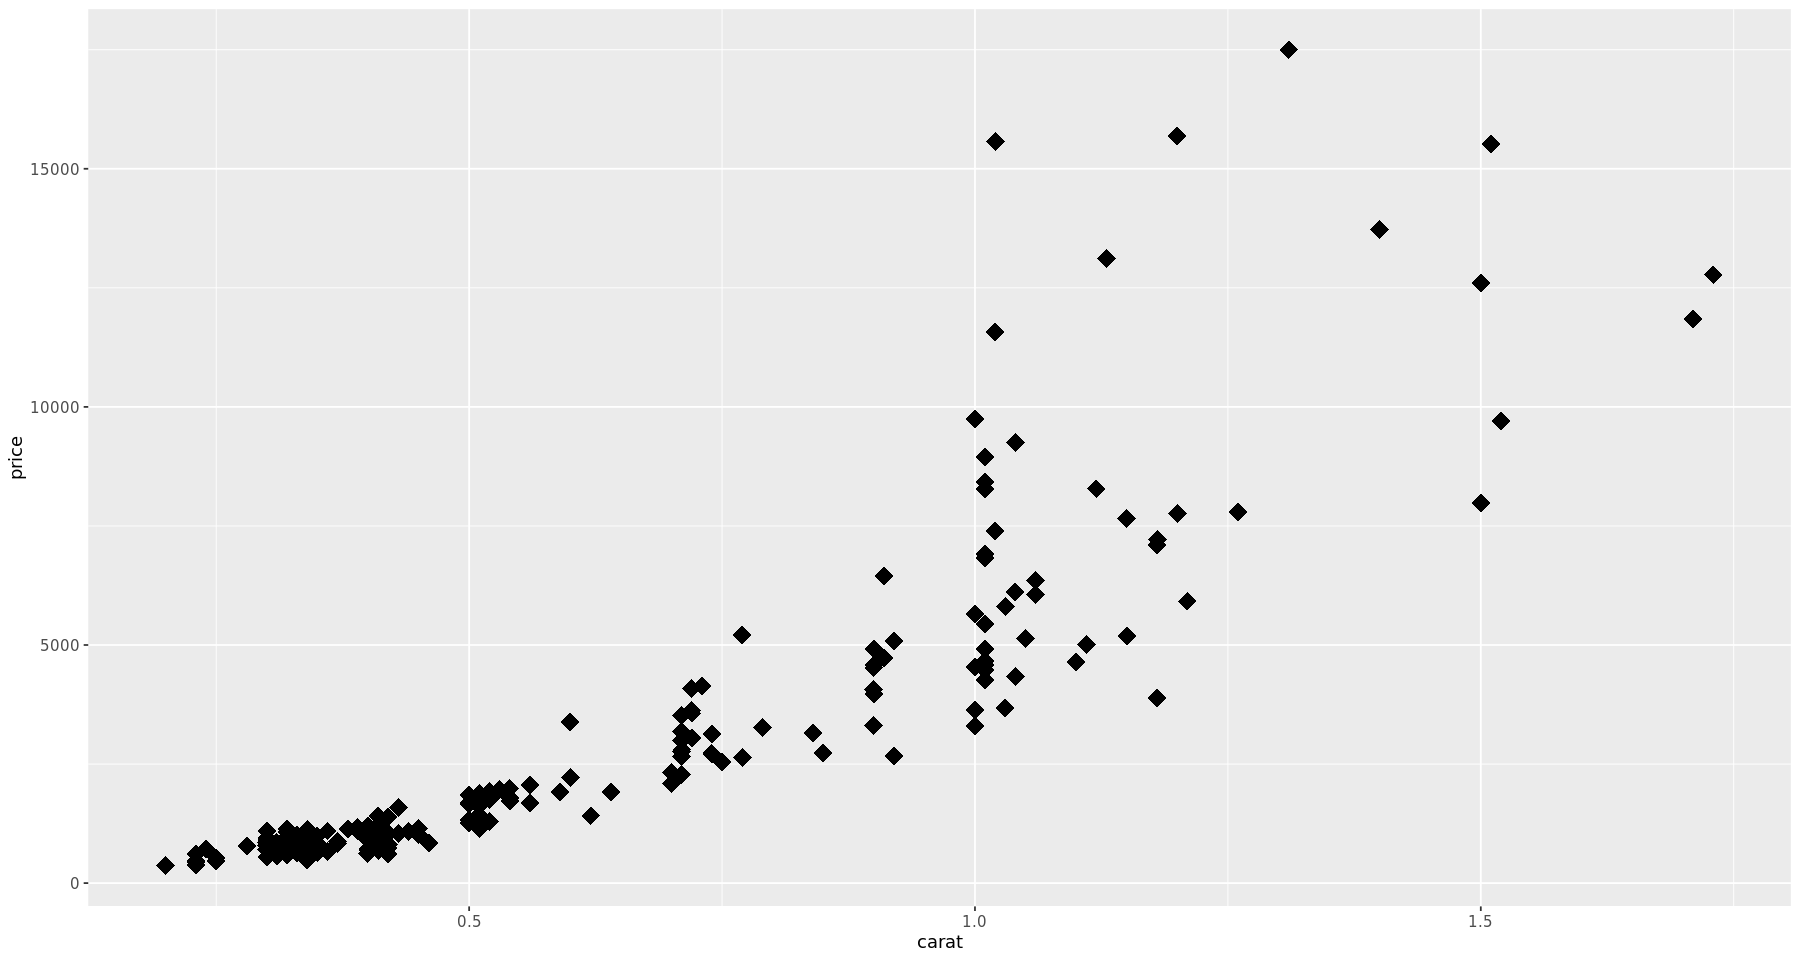

In [6]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = plot.data, mapping = aes(x = carat, y = price)) +
    geom_point(shape=18, size = 5)

Add titles to the chart

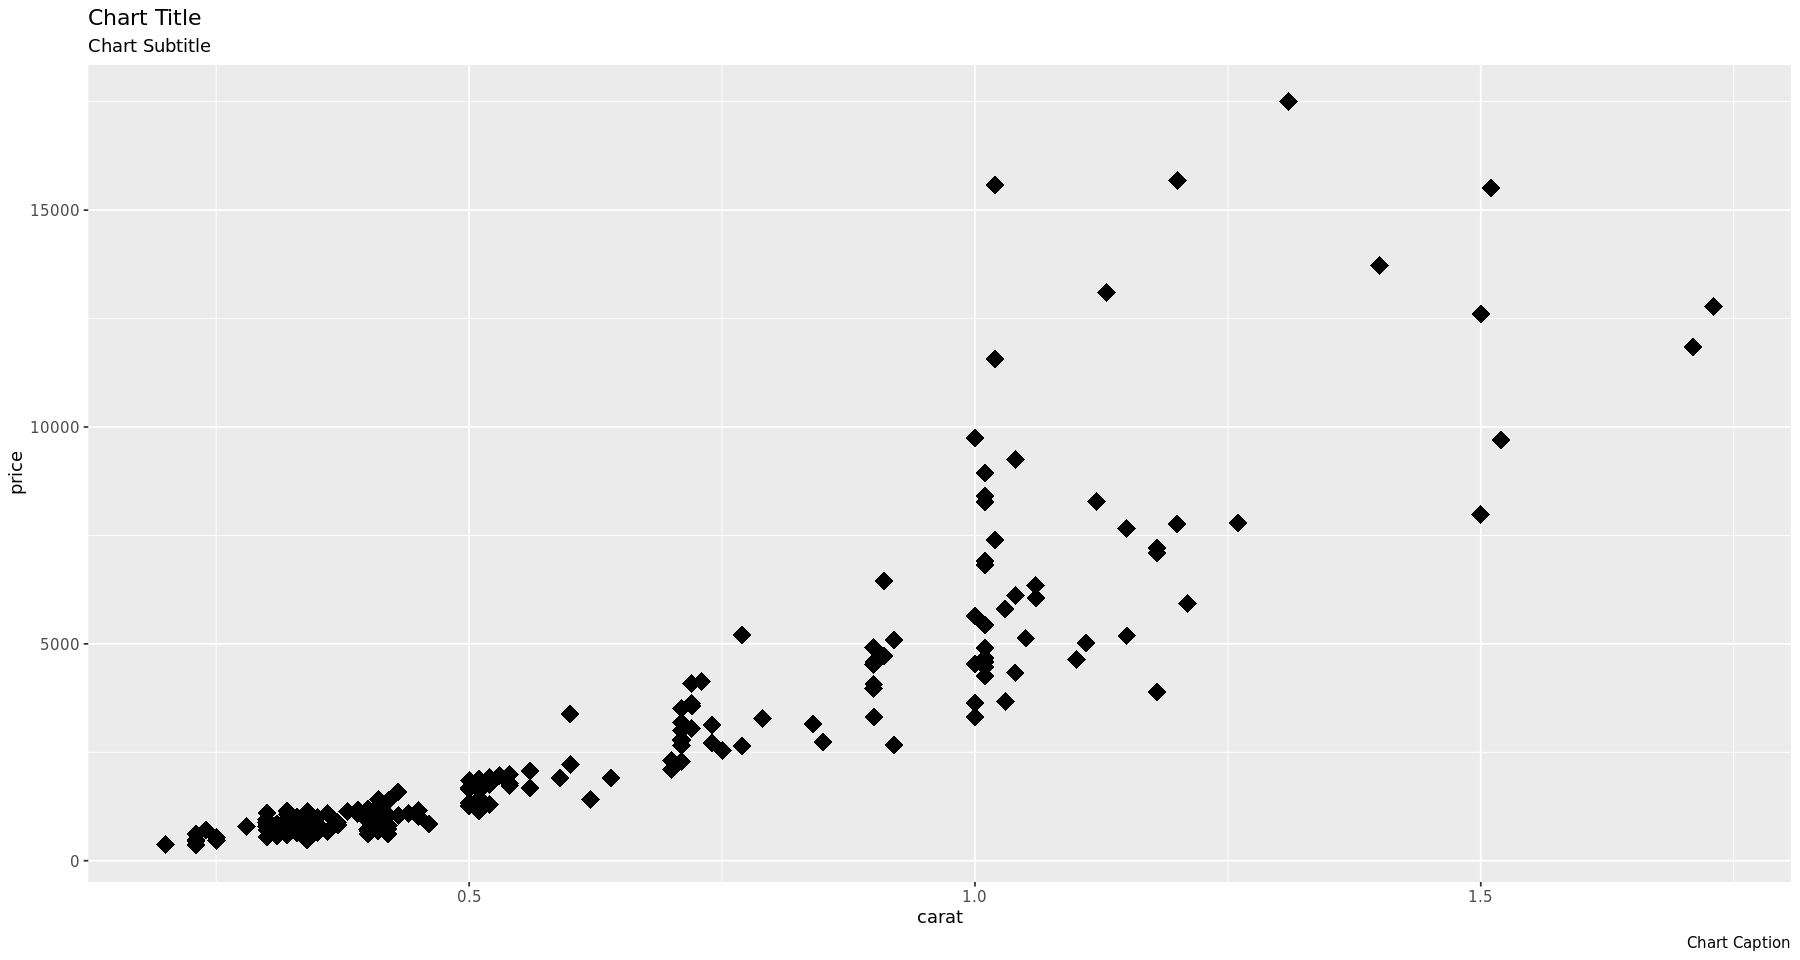

In [7]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = plot.data, mapping = aes(x = carat, y = price)) +
    geom_point(shape=18, size = 5) +
    labs(
        title = "Chart Title",
        subtitle = "Chart Subtitle",
        caption = "Chart Caption"
    )

Add themes

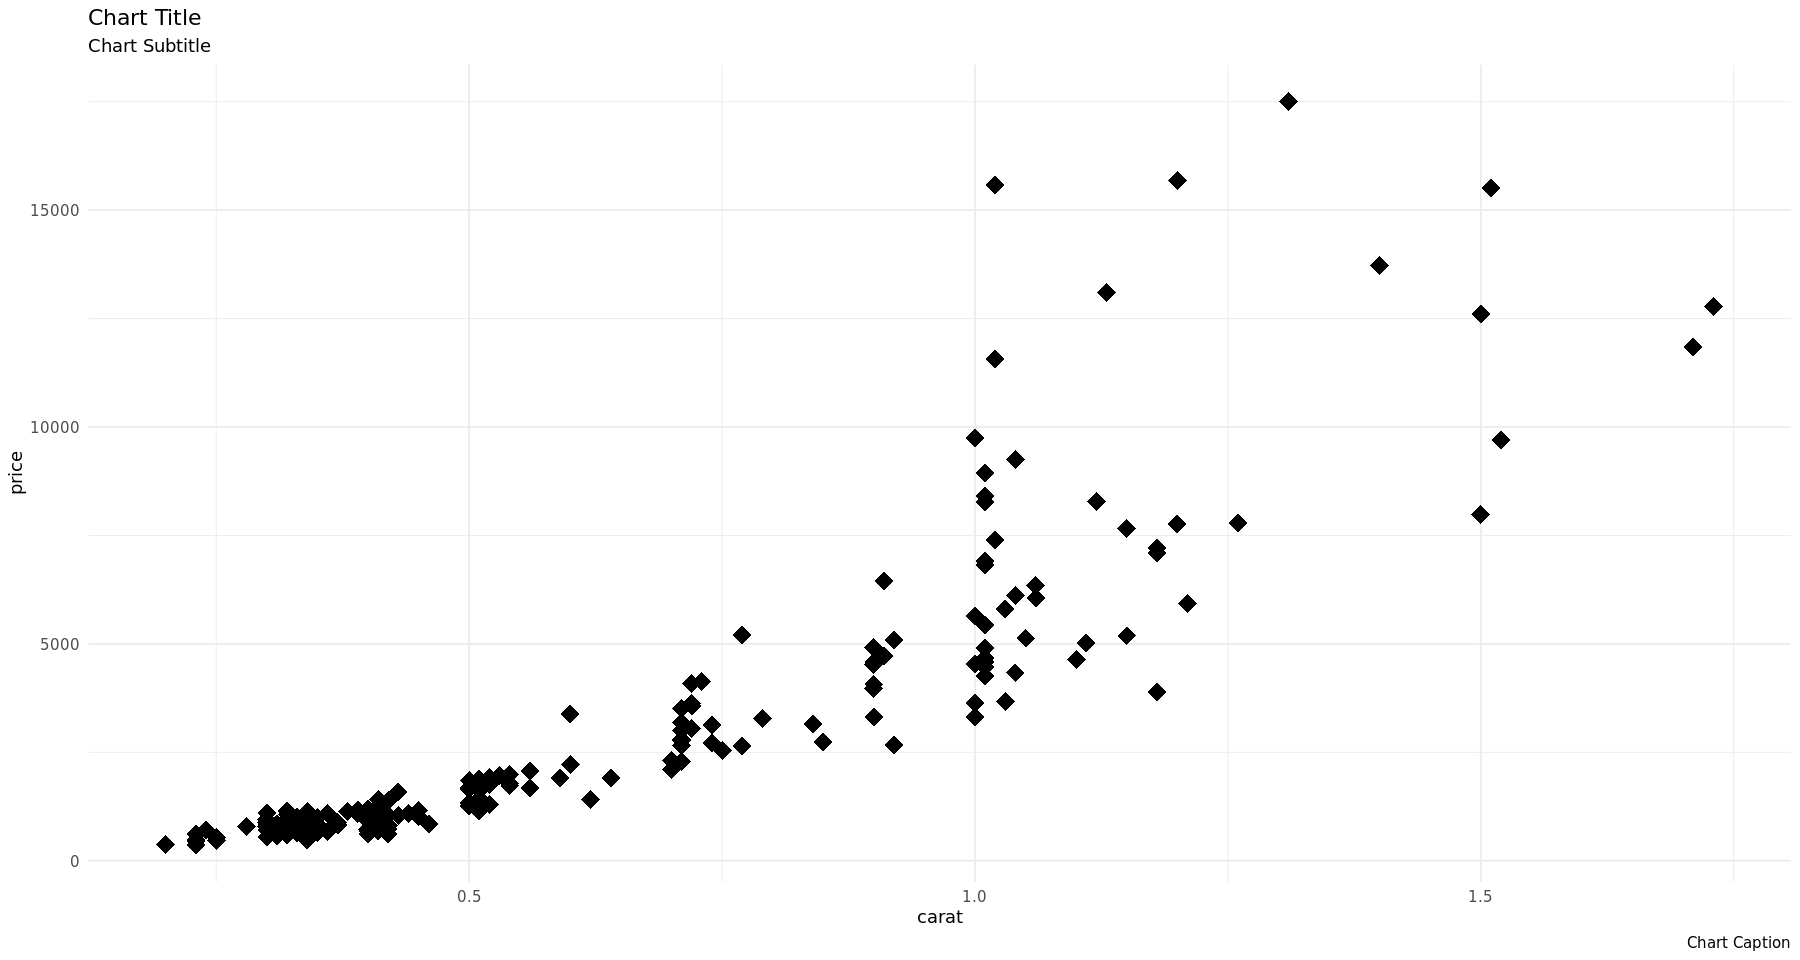

In [8]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = plot.data, mapping = aes(x = carat, y = price)) +
    geom_point(shape=18, size = 5) +
    labs(
        title = "Chart Title",
        subtitle = "Chart Subtitle",
        caption = "Chart Caption"
    ) +
    theme_minimal()

# List of available **geoms** and **themes**

Link to available geoms:  https://ggplot2.tidyverse.org/reference/  
List of available themes:  https://ggplot2.tidyverse.org/reference/ggtheme.html  
List of themes in ***ggthemes***:  https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/  

# Creating line plots in R with ggplot2

In this example we are using ggplot to create a line visual. The line chart will be used to show the total point scored by Kobe Bryant, Pau Gasol, and Lamar Odom during the 2008 NBA basketball season. The data set was acquired from the lubridate package and the code used to get it is listed in the code snippet below:

In [9]:
options(repr.plot.width=15, repr.plot.height=8)
players <- c("Kobe Bryant", "Pau Gasol", "Lamar Odom")
plot.data <- lakers %>%
    filter(result == "made" & team == "LAL" & player %in% players) %>%
    mutate(date = ymd(date)) %>%
    group_by(player, date) %>%
    summarize(points = sum(points))
head(plot.data,10)

`summarise()` regrouping output by 'player' (override with `.groups` argument)



player,date,points
<chr>,<date>,<int>
Kobe Bryant,2008-10-28,23
Kobe Bryant,2008-10-29,16
Kobe Bryant,2008-11-01,33
Kobe Bryant,2008-11-05,27
Kobe Bryant,2008-11-09,23
Kobe Bryant,2008-11-11,27
Kobe Bryant,2008-11-14,29
Kobe Bryant,2008-11-18,21
Kobe Bryant,2008-11-20,24


Create line chart that compares total points scored by Kobe Byrant, Lamar Odom, and Pau Gasol during the 2008 season using ***geom_line()***:

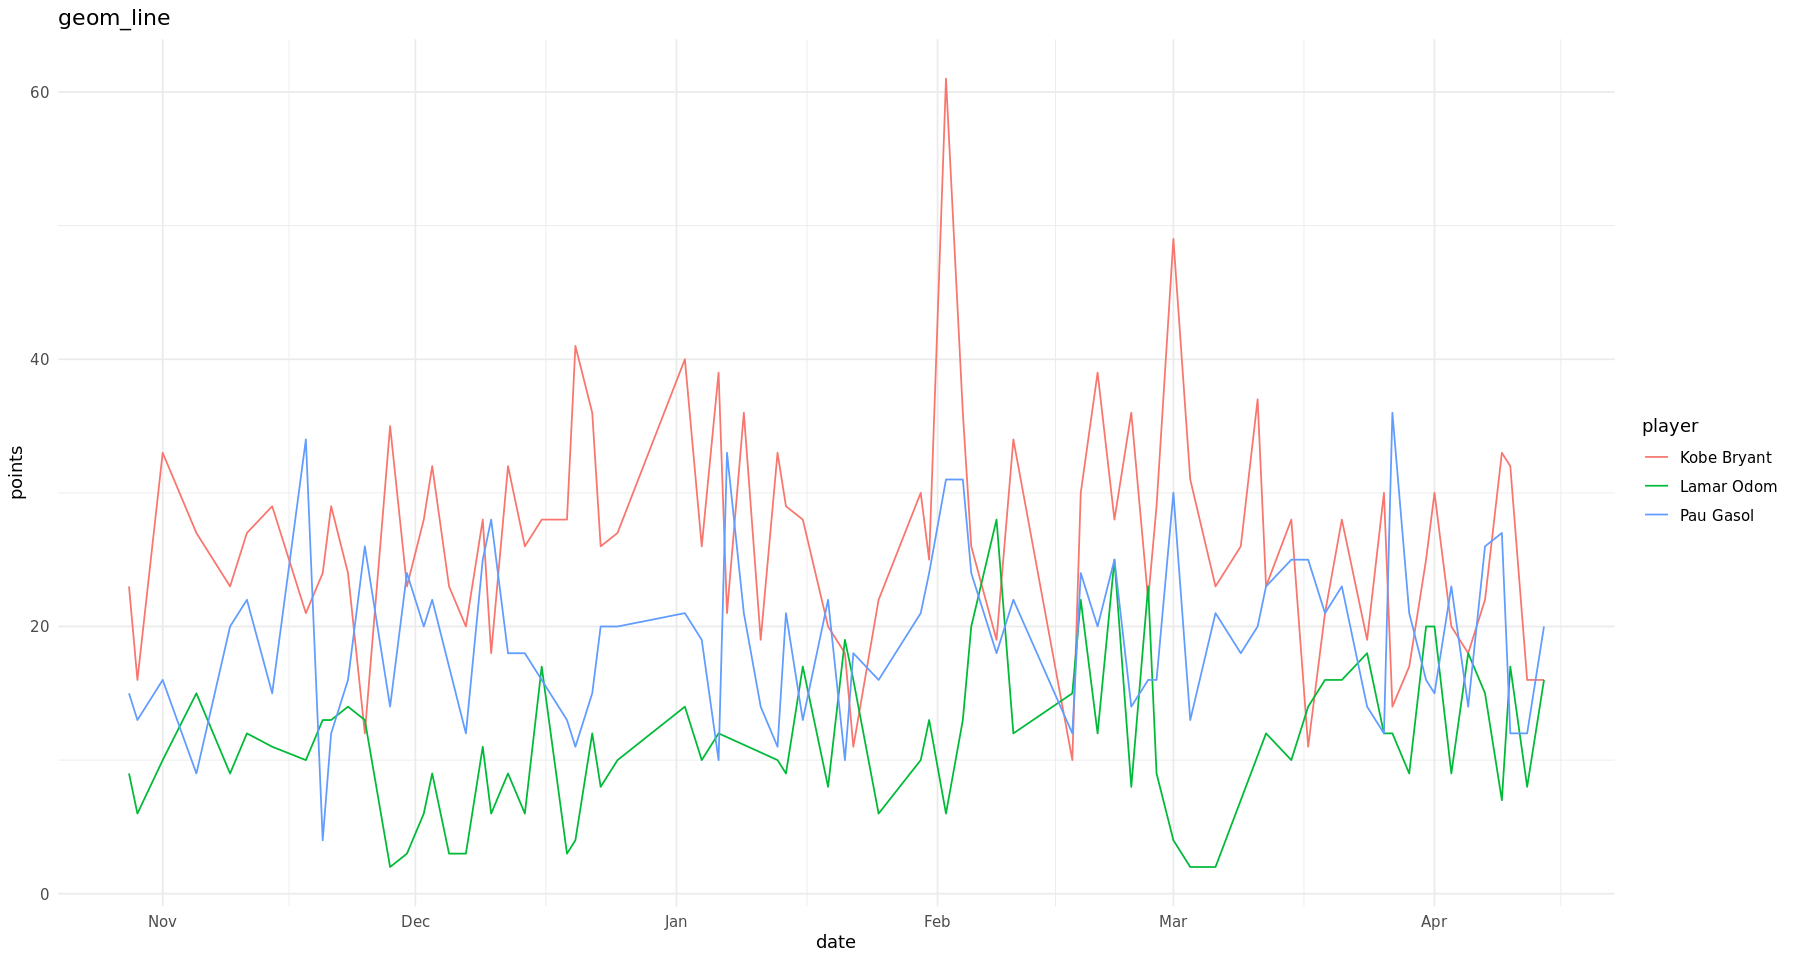

In [10]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=plot.data, mapping=aes(x=date,y=points,color=player)) +
    geom_line() +
    labs(title = "geom_line") +
    theme_minimal()

Notice that we were able to create the line chart visual with just a few lines of code. As in the scatter plot visual, we set the global properties in the ***ggplot*** visual. The properties set in this visual are:
- the ***date*** column is set to the ***x axis***
- the ***points*** column is set to the ***y axis***
- the ***player*** column is set to the ***color*** argument. Do this does two things. It puts the data for the players in its on series and it gives the a unique color. Without this aesthetic the points will be grouped into one series as shown in the visual below:

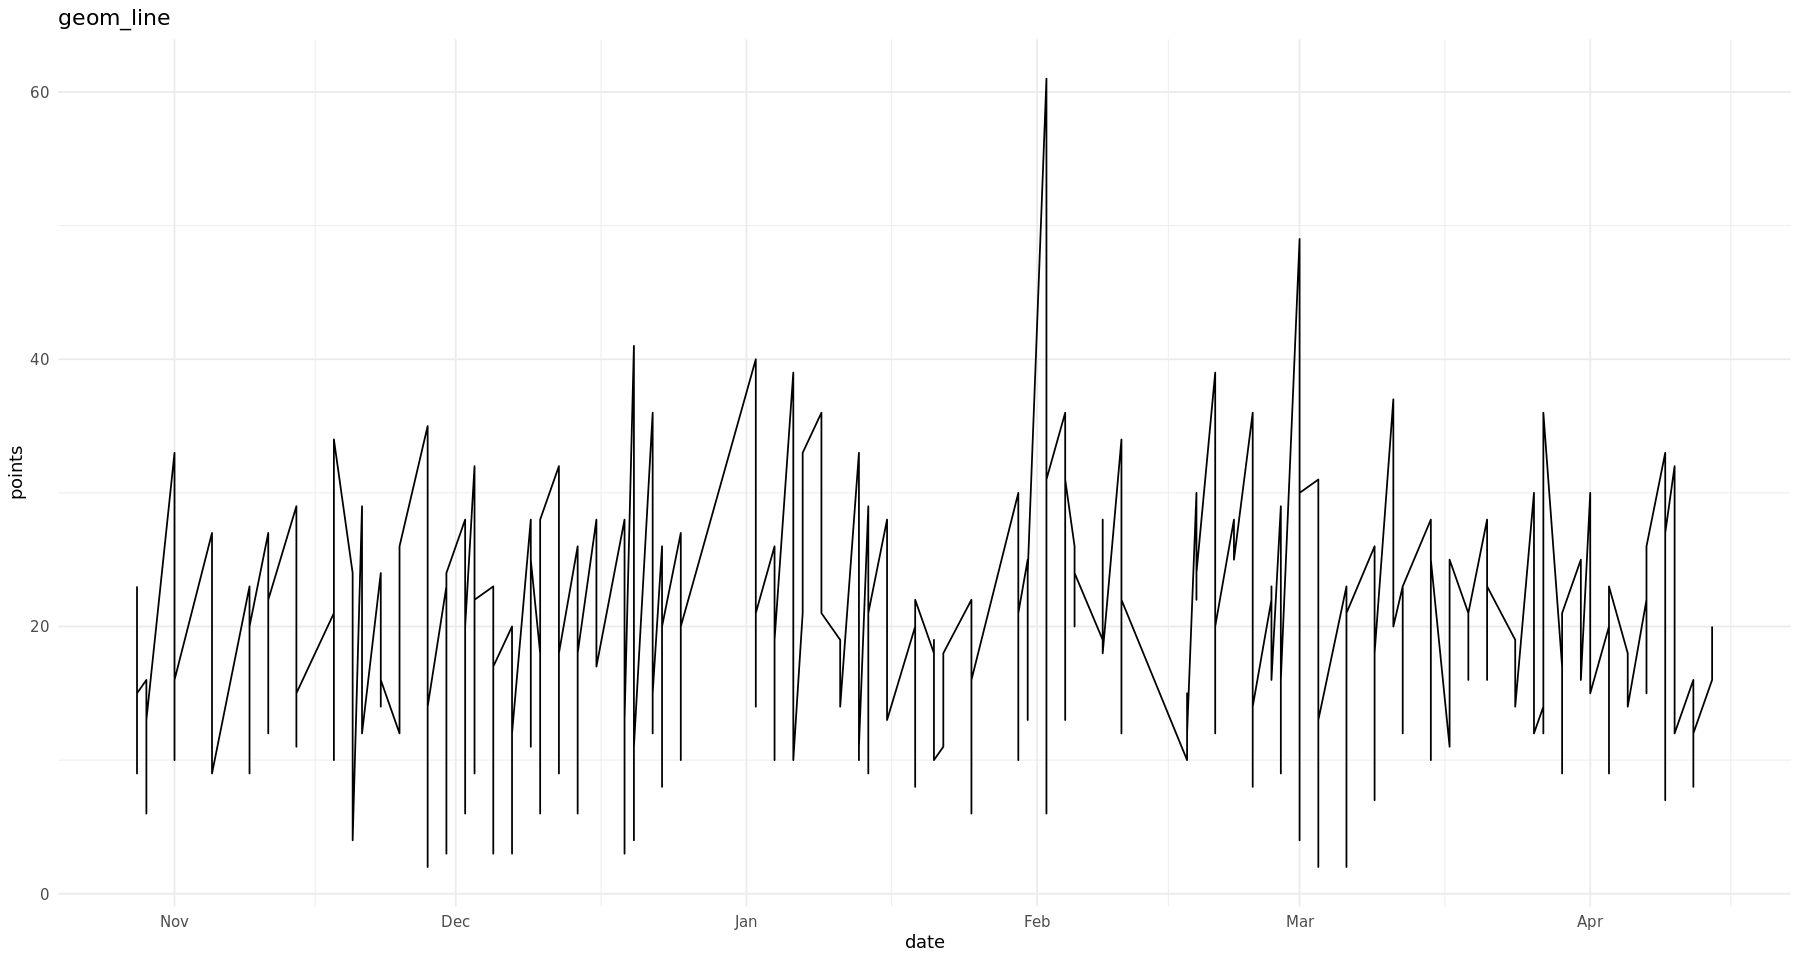

In [11]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=plot.data, mapping=aes(x=date,y=points)) +
    geom_line() +
    labs(title = "geom_line") +
    theme_minimal()

Plotting the line series of points scored for each player in one visual may be somewhat hard to read due to the overlapping of the line series. This issue can be eliminated by splitting out each series into individuals charts as illustrated below using ***facet_wrap*** function that is illustrated below:

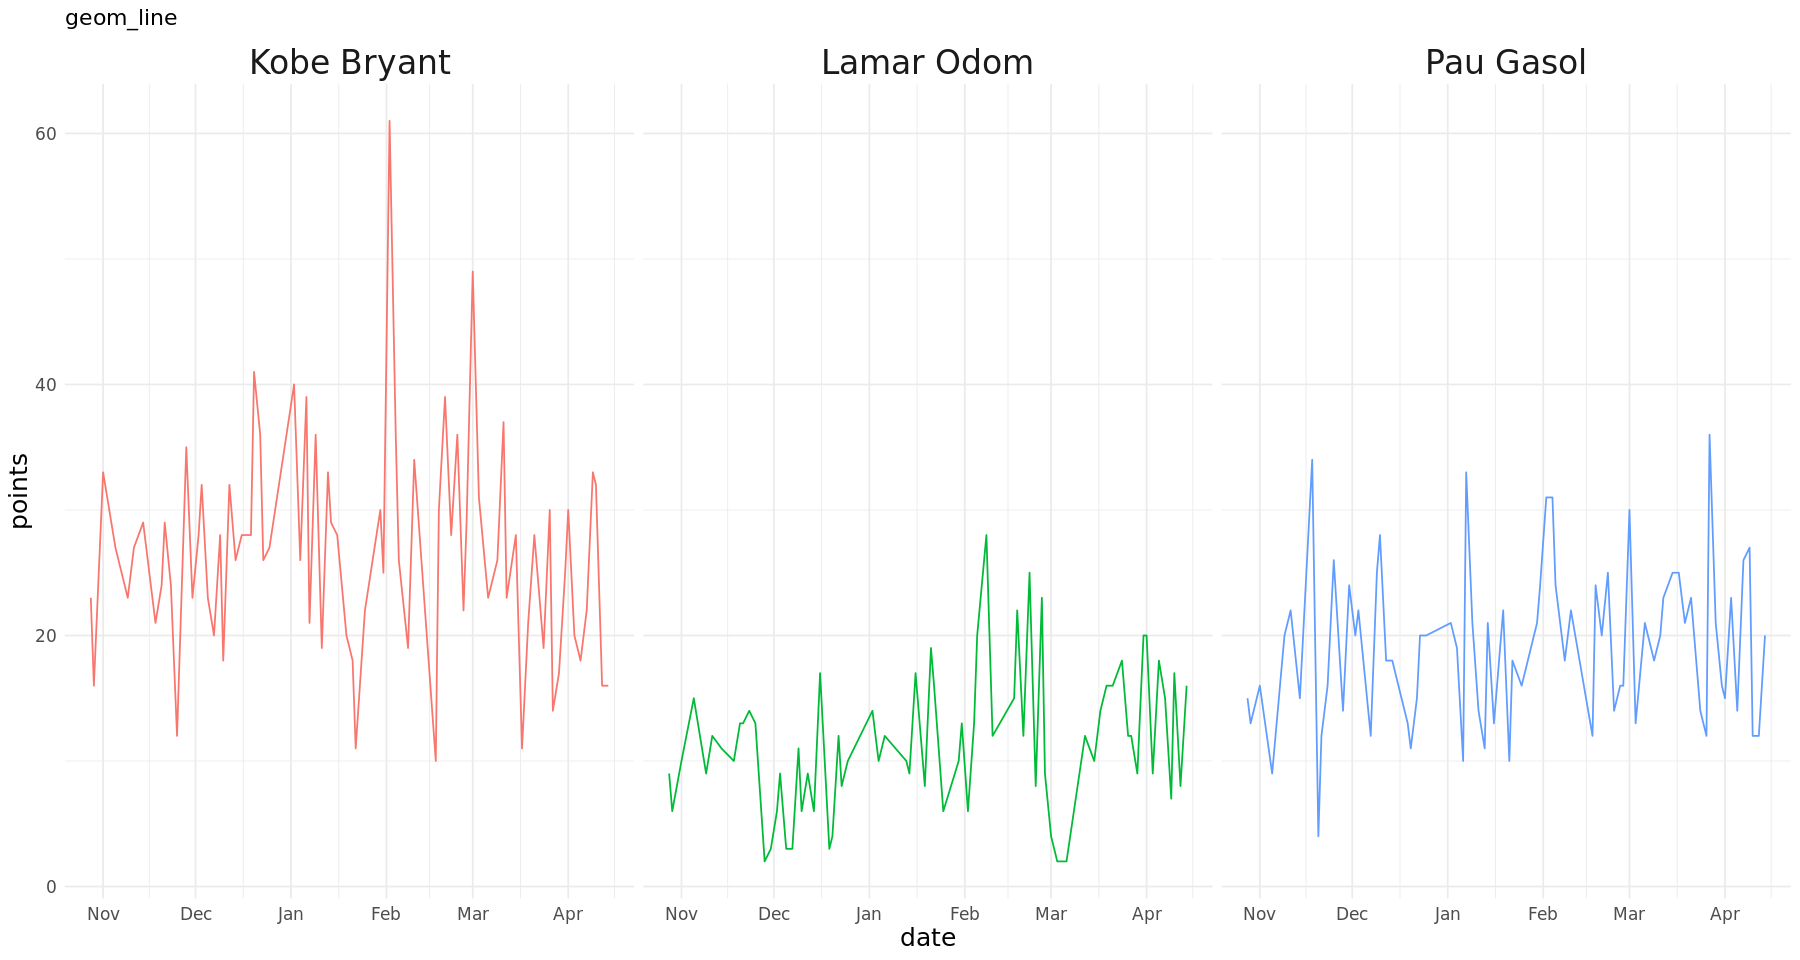

In [12]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data=plot.data, mapping=aes(x=date,y=points,color=player)) +
  geom_line() +
  labs(title = "geom_line") +
  theme_minimal() +
  facet_wrap(~player) +
  guides(color="none") +
  theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15),
        strip.text = element_text(size=20))

In [13]:
?theme

We are able to easily split out the 3 line series into their own separate charts very easily using one simple function. Here is the code used to do the splitting:  `facet_wrap(~player)`. The remaining code was used to tidy up the chart. The ***guides()*** function was used to remove the legend for the ***color*** from the chart. The ***theme()*** function was used to change the font size of the month labels on the ***x axis***.  The ***theme()*** function is very powerful and can be used to customized most of the non-data elements of the chart. Go to this URL to get more detailed information about this function:  https://www.rdocumentation.org/packages/ggplot2/versions/3.3.2/topics/theme.

Note you can easily access documentation in R when you want to learn how a function works. Below is the code needed to get documentation on the ***facet_wrap()*** function.

In [14]:
?facet_wrap()

# Creating bar plots in R with ggplot2

Creating ***bar charts*** in R via ***ggplot2*** is relatively easy. It is accomplished using the ***geom_col*** geom. In the following examples we will use the ***Titan*** data set to get the data needed to determine the number of fatalities by class. The code used to get the data needed is contained in the code snippet below:

In [15]:
plot.data <-
    data.frame(Titanic) %>%
    group_by(Class) %>%
    summarize(`Total Freq` = sum(Freq))
plot.data

`summarise()` ungrouping output (override with `.groups` argument)



Class,Total Freq
<fct>,<dbl>
1st,325
2nd,285
3rd,706
Crew,885


The method used to create the ***column chart*** is very similar to the methods we used to create the previous charts. The big difference is the geom that we use. The geom that is used to create the ***column chart*** is the ***geom_col*** geom as illustrated in the code snippet below:

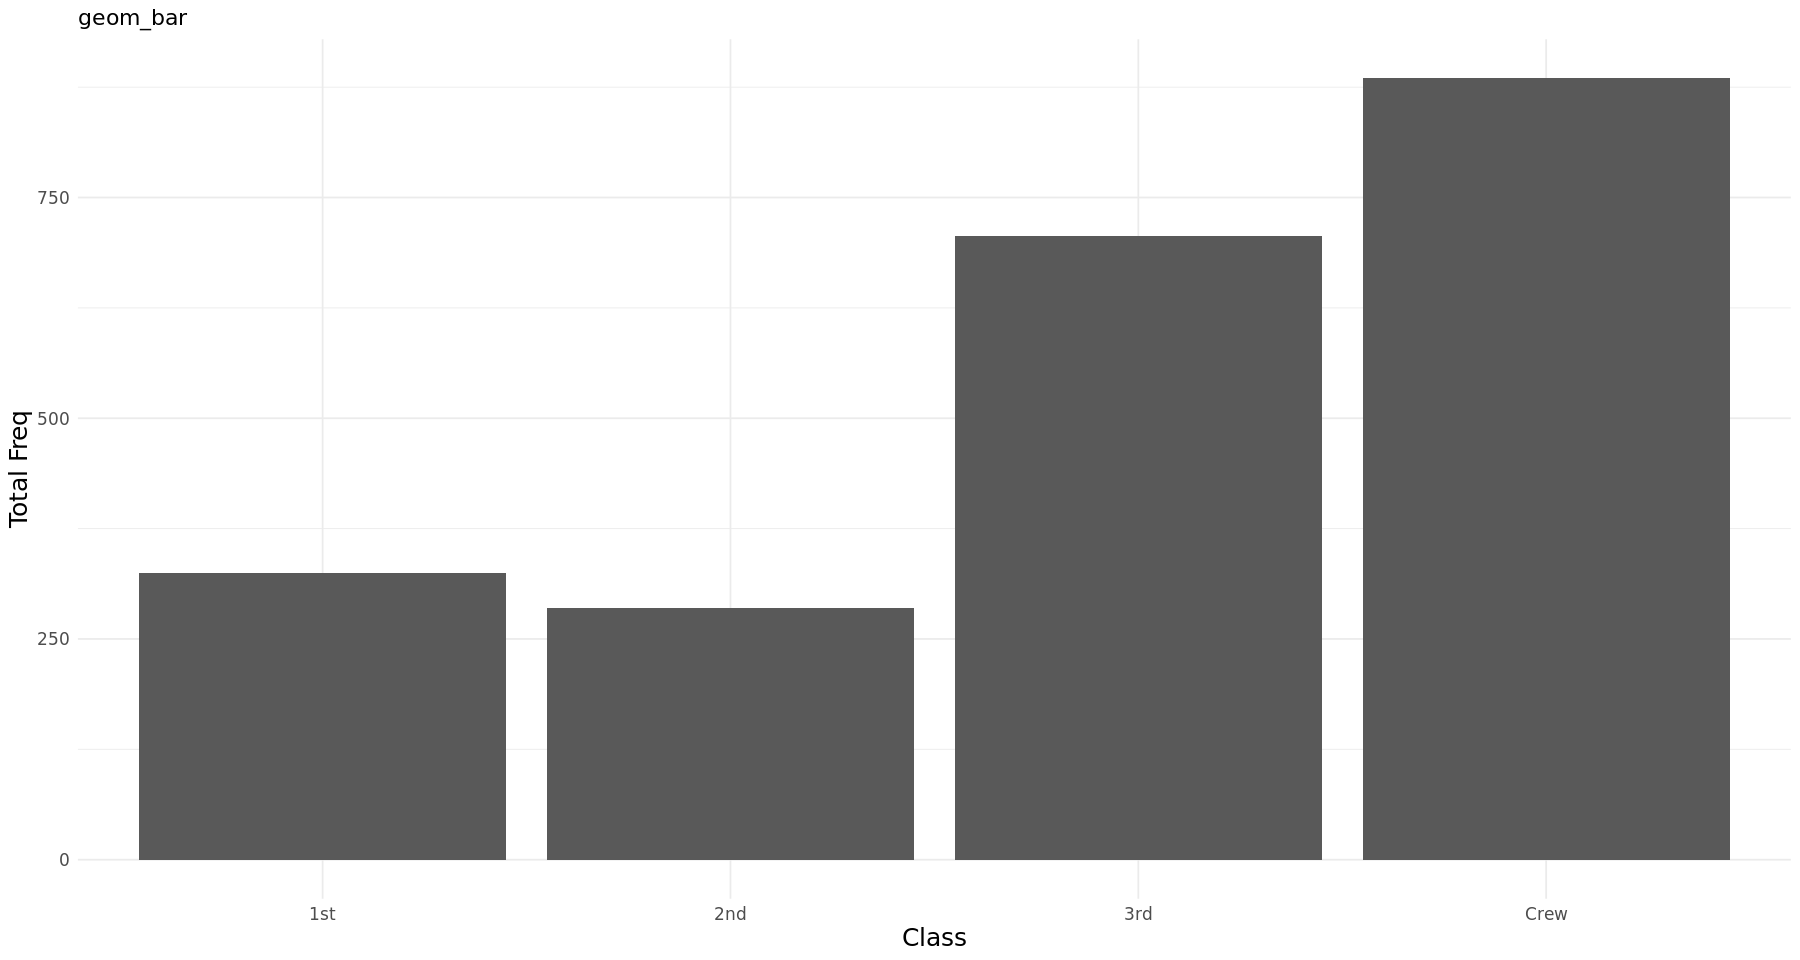

In [16]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(data = plot.data, mapping = aes(x = Class, y = `Total Freq`)) +
    geom_col() +
    labs(title = "geom_bar") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

At this point you should have a good understanding of how the data and aesthetics were mapped. As you have probably expected, the ***geom_col*** geom created bars whose height represents the number of fatalities for the given class.

The ultimate goal of this visual is to rank the class by fatalities to gauge which class experienced the most. That is accomplished better with a horizontal bar chart instead of the vertical bar charts shown above. That is easily accomplished with the ***coord_flip()*** function illustrated below:

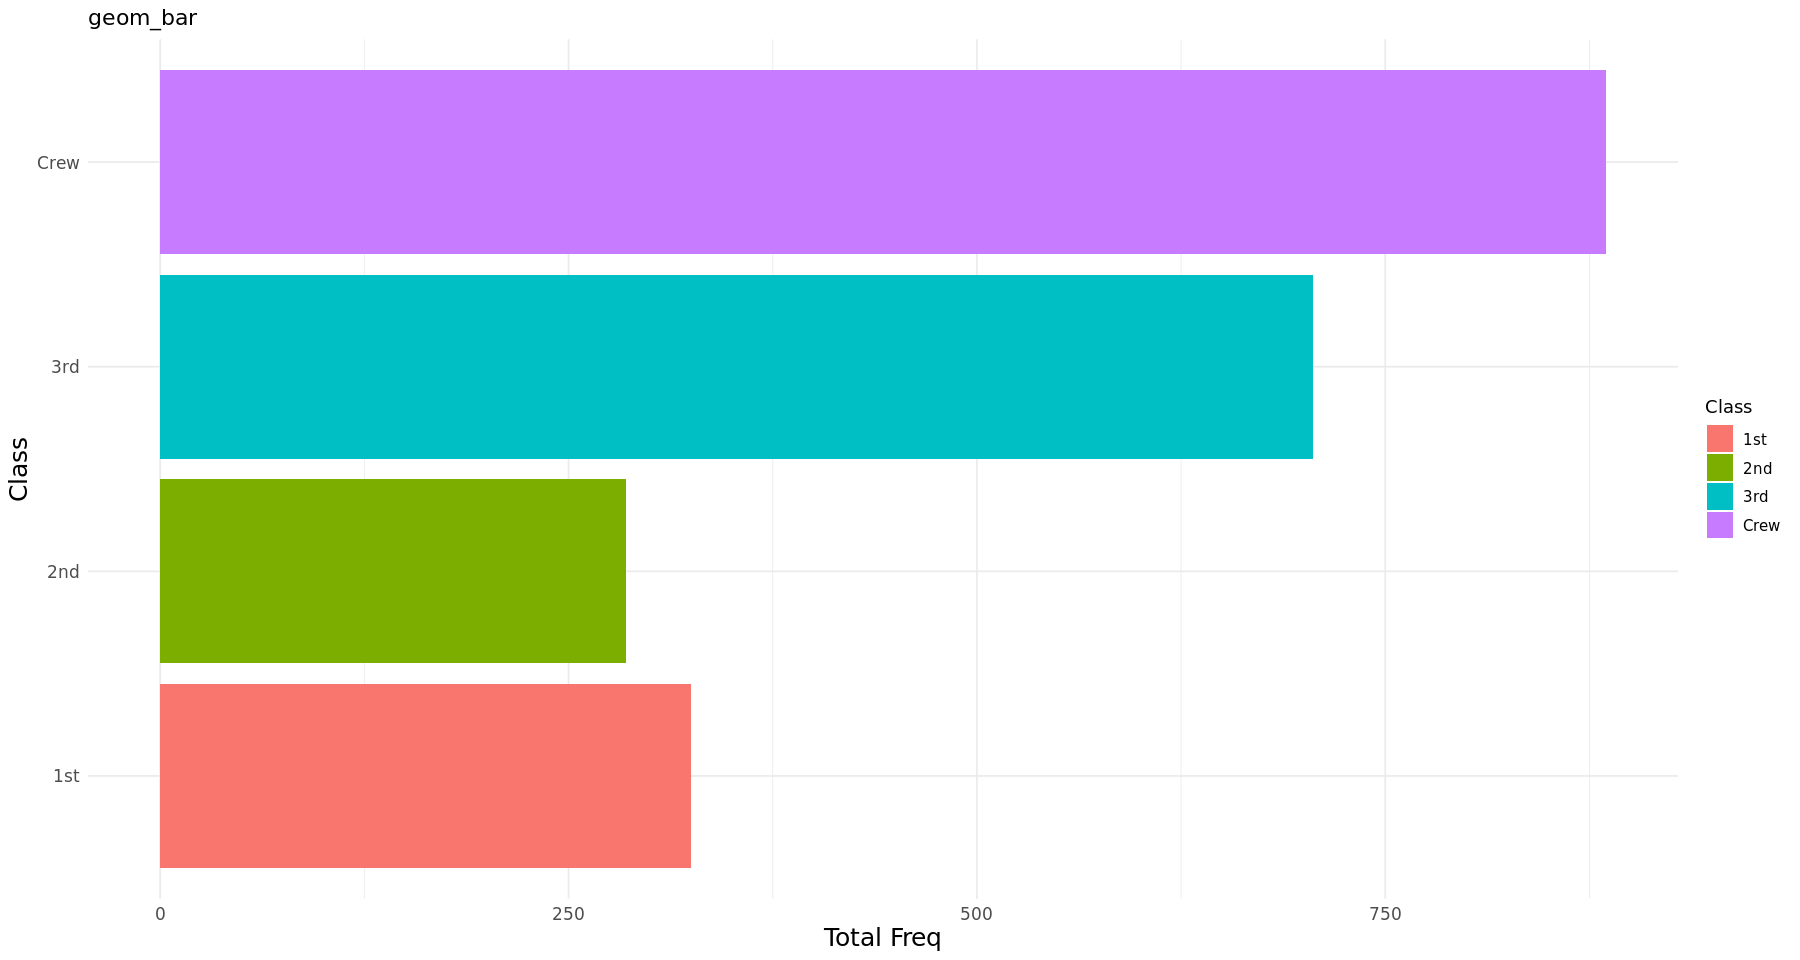

In [17]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(x = Class, y = `Total Freq`, fill = Class)) +
    geom_col() +
    coord_flip() +
    labs(title = "geom_bar") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

The ***coord_flip()*** function displays what's on the ***x axis*** on the ***y axis*** and vice versa. The result when applied to the ***vertical bar chart*** above it is a ***horizontal bar chart***.

We almost have a production quality chart but there are a few things we could do to make it better. We want to sort the bars in descending order to better show the rank and we want to color the inside of the bars the same color because coloring each bar differently adds little value. We accomplish this using the code below:

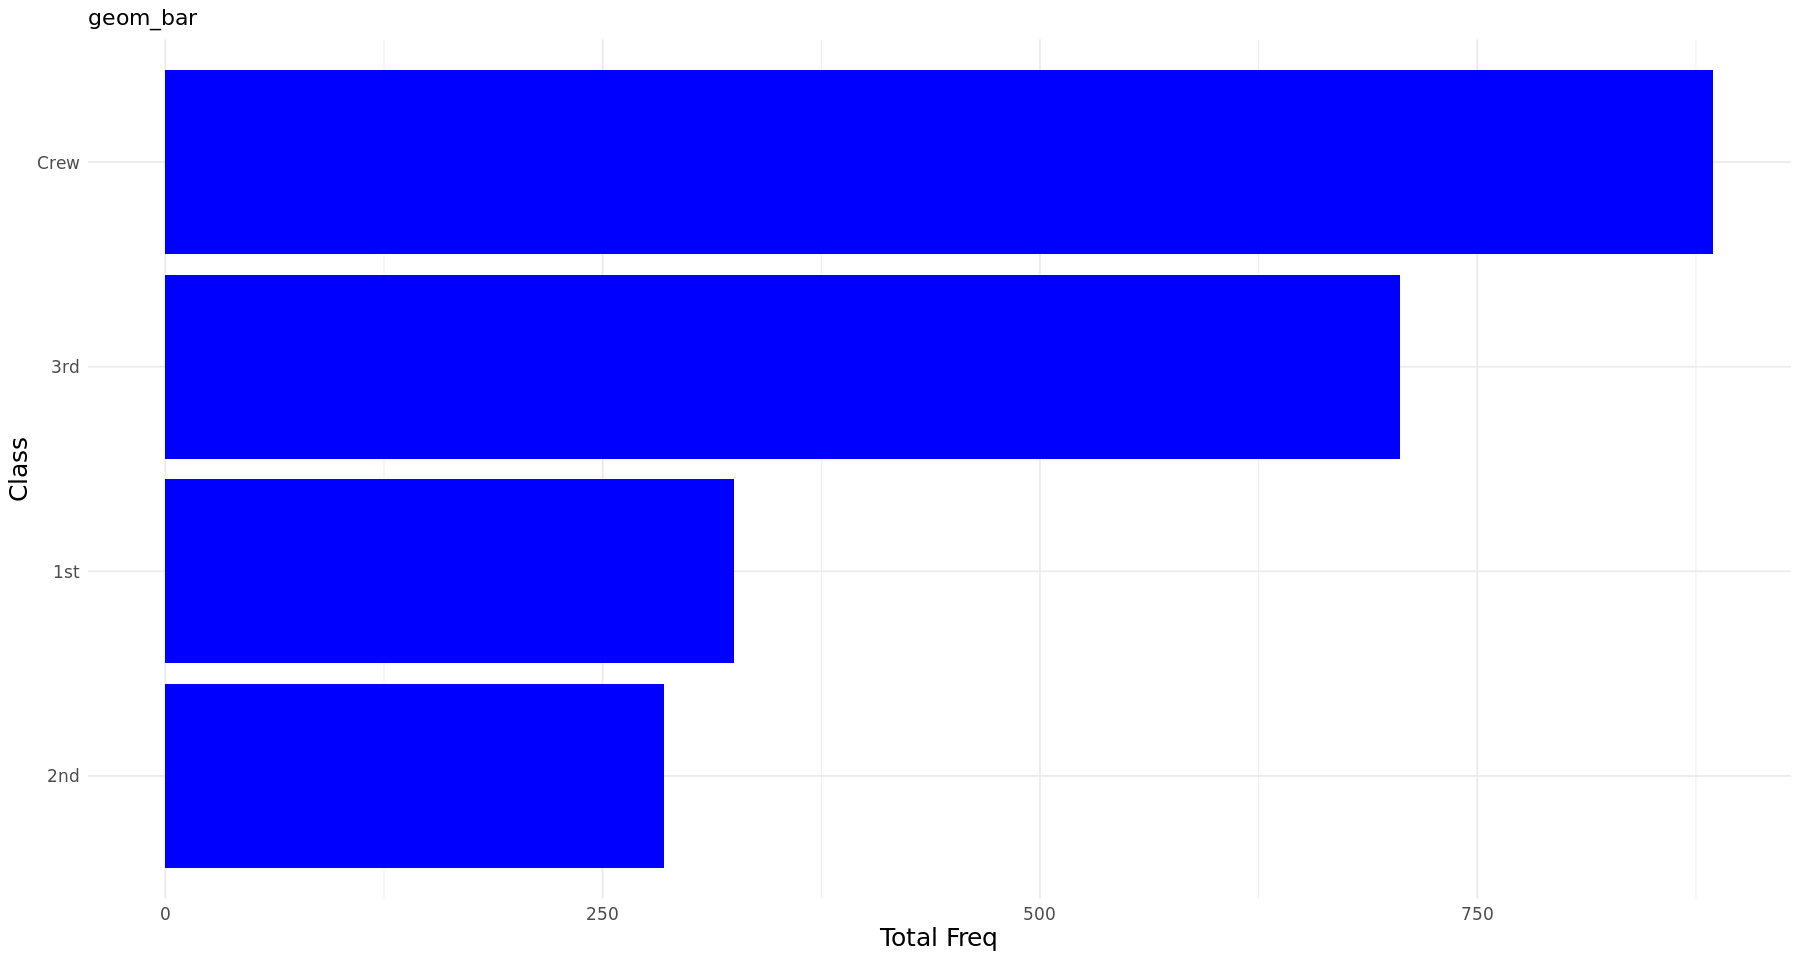

In [18]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(x = fct_reorder(Class,`Total Freq`) , y = `Total Freq`)) +
    geom_col(fill = "blue") +
    xlab(label = "Class") +
    coord_flip() +
    labs(title = "geom_bar") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

We sort the bars by changing the sort behavior of the the ***Class*** column. The ***Class*** column is a categorical based column and those type of columns in R has a special data type. The name of the data type is ***factor***. The ***factor*** data type has many features that makes it easier to work with categorical data. One of those features is the ability to sort a column based on the value of another column. In this situation we want to sort the ***Classs*** field based on the ***Total Freq*** in descending order. That is accomplished by making the following adjustment to the way the ***x axis*** aesthetic is set. The adjustment is shown here:  `fct_reorder(Class,`Total Freq`)`.

The ***bar charts*** above are simple examples of how to create ***bar charts*** in R using ***ggplot2***. You can get pretty create with ***bar charts*** using ***ggplot***. The graphic below is an example. The graphic below is a ***bar chart*** that has subtle features such as annotations that are dynamically positioned with dynamically generated text. It also positioned the value labels of the bars inside the bars so that they will not overlay the annotation. The visaul in question is displayed below:


── Column specification ────────────────────────────────────────────────────────
cols(
  Country = col_character(),
  `Total Expend %` = col_double(),
  Year = col_double()
)




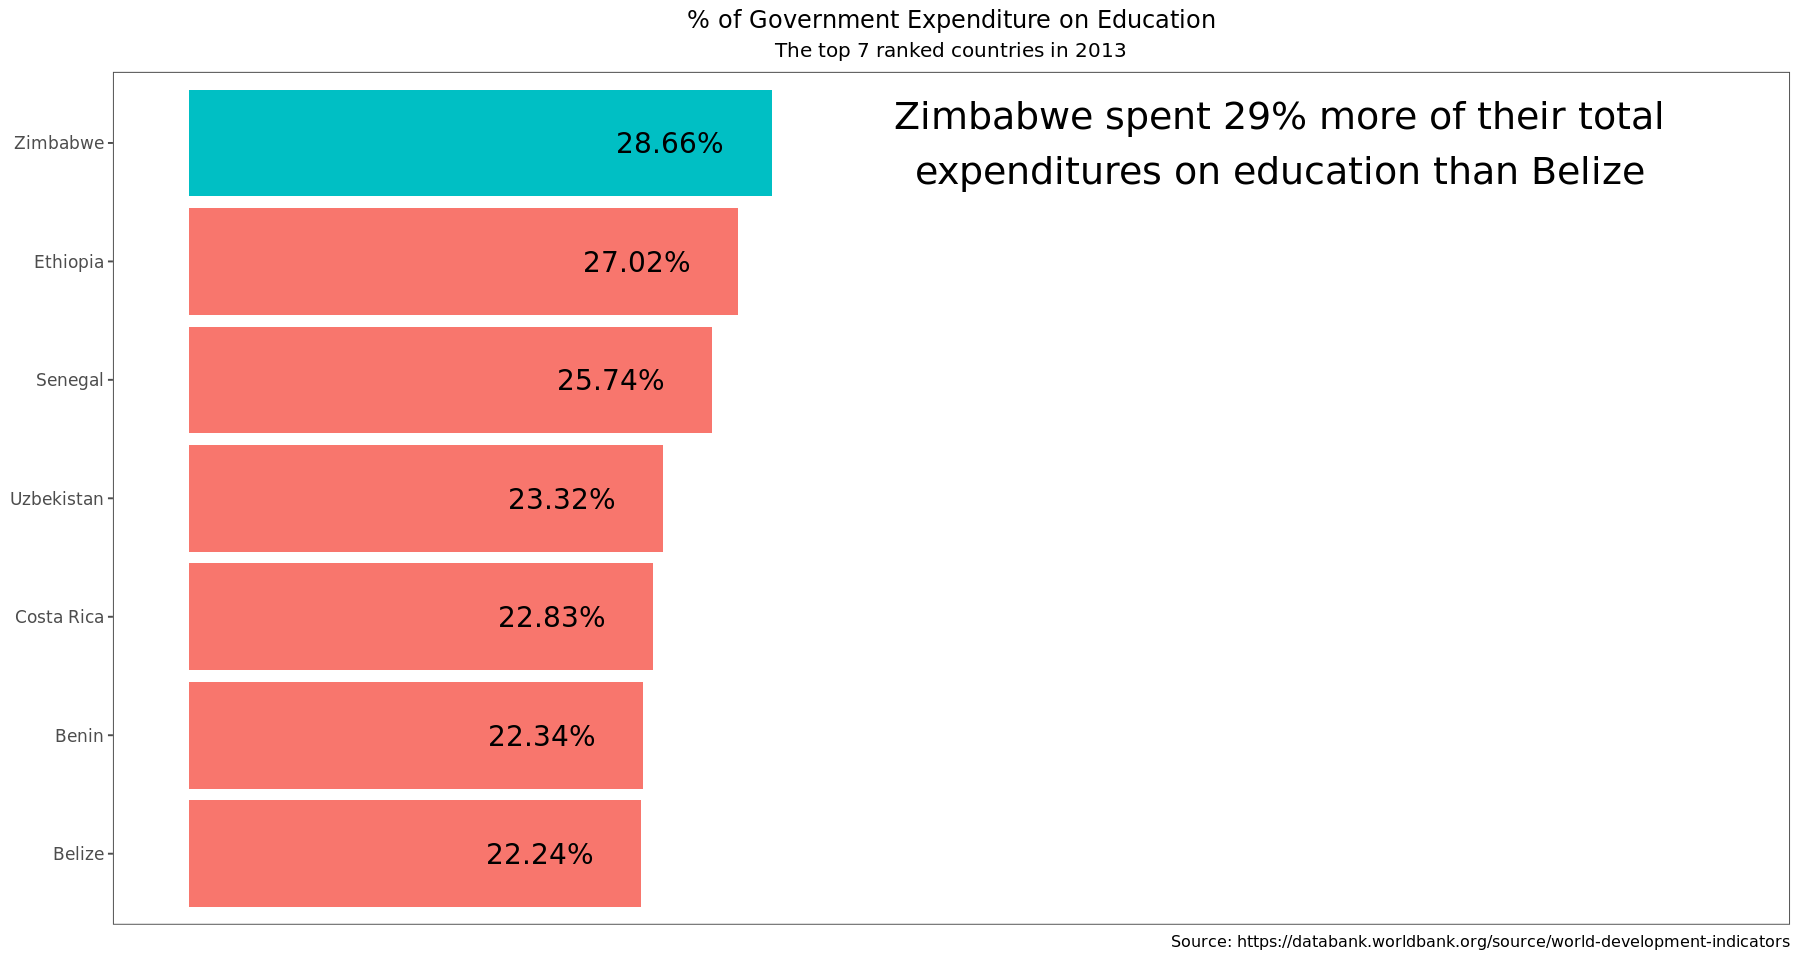

In [19]:
options(repr.plot.width=15, repr.plot.height=8)
library(ggthemes)
library(tidyverse)
library(scales)

dataset <- read_csv("../Datasets/dataset.csv")

currentColumns <- sort(colnames(dataset))
requiredColumns <- c("Country", "Total Expend %", "Year")
columnTest <- isTRUE(all.equal(currentColumns, requiredColumns))
reportYear <- unique(dataset$Year)

plotdata <- 
    dataset %>%
    mutate(
        rank = dense_rank(desc(`Total Expend %`)),
        `Country` = fct_reorder(`Country`, rank, .desc = TRUE), 
        callout = ifelse(rank == 1, TRUE, FALSE)
    ) %>%
    filter(rank <= 7)

countryToAnnotate <- plotdata$`Country`[plotdata$rank == 1]
minExpenditure <- min(plotdata$`Total Expend %`)
maxExpenditure <- max(plotdata$`Total Expend %`)
minCountry <- plotdata$`Country`[plotdata$`Total Expend %` == minExpenditure]
minCountry <- paste(minCountry, collapse = " & ") 
maxCountry <- plotdata$`Country`[plotdata$`Total Expend %` == maxExpenditure]
maxCountry <- paste(maxCountry, collapse = " & ")
mainTitle = "% of Government Expenditure on Education"
subTitle = 
    paste(
          "The top 7 ranked countries in", 
          reportYear, 
          sep = " ")
caption = "Source: https://databank.worldbank.org/source/world-development-indicators"

label_val <- 
    str_wrap(
             paste(maxCountry, "spent",  
             percent((maxExpenditure/minExpenditure-1)), 
             "more of their total expenditures on education than", minCountry, sep = " "),
             width = 40
    )

p <- 
    ggplot(
        data = plotdata, 
        mapping = aes(x = `Country`, y = `Total Expend %`, fill = callout, label = percent(`Total Expend %`))
    ) +
    geom_bar(stat="identity", mapping = aes(fill = callout)) +
    geom_text(nudge_y = -0.05, size = 6) +
    scale_y_continuous(limits = c(0,0.75), labels = NULL, breaks = NULL) +
    coord_flip() +
    annotate("text", label = label_val, x = countryToAnnotate[1], y = maxExpenditure + 0.25, size = 8) +
    labs(title = mainTitle, subtitle = subTitle, caption = caption) +
    xlab(label = NULL) +
    ylab(label = NULL) +
    guides(fill=FALSE) +
    theme_few() +
    theme(plot.title = element_text(hjust = 0.5), 
          plot.subtitle = element_text(hjust = 0.5),
          axis.text = element_text(size=10),
          axis.title = element_text(size=15))
p

# Creating histogram plots in R with ggplot2

The last visual we will go over is the ***histogram*** and we will use the ***geom_historgram()*** geom to create it. The histogram chart is used to show distribution of data based on specified ranges. Let's go over the code needed to create one in R using ***ggplot2***. Before we do so, we need to define the data frame that the visual will use with the code below:

In [20]:
plot.data <- as_tibble(airquality)
head(plot.data,10)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


The code uses the ***airquality*** data set as the source data for the histogram. The ***airquality*** data set contains air quality readings that were recorded in New York. We will use the temparature recordings from the data set to build the histogram.

We will use the ***geom_histogram()*** geom to create the histogram. The ***geom_histogram()*** geom makes it easy to configure the size of the bins used in your histogram. Below we set the bin width to 10 via the ***binwidth*** argument as illustrated below:

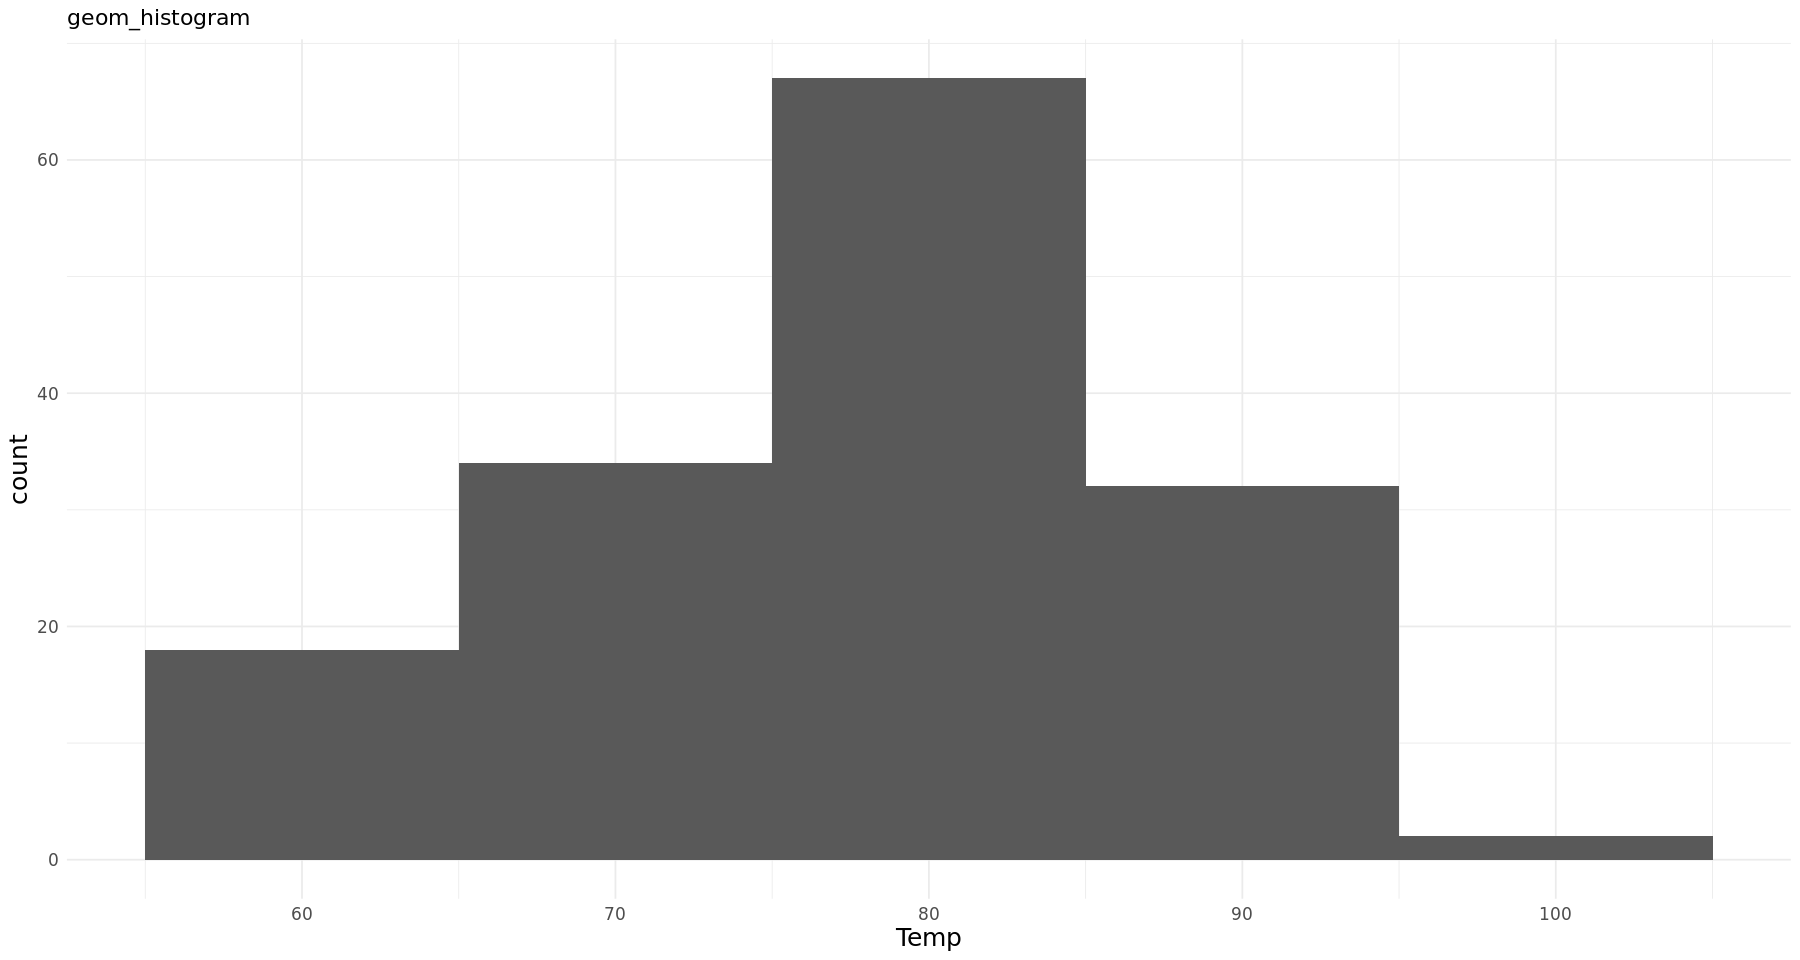

In [21]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(Temp)) +
    geom_histogram(binwidth = 10) +
    labs(title = "geom_histogram") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

If a bin width of 10 is to big you can easily change it to your desired width. Below we change the size of the bin width from 10 to 5:

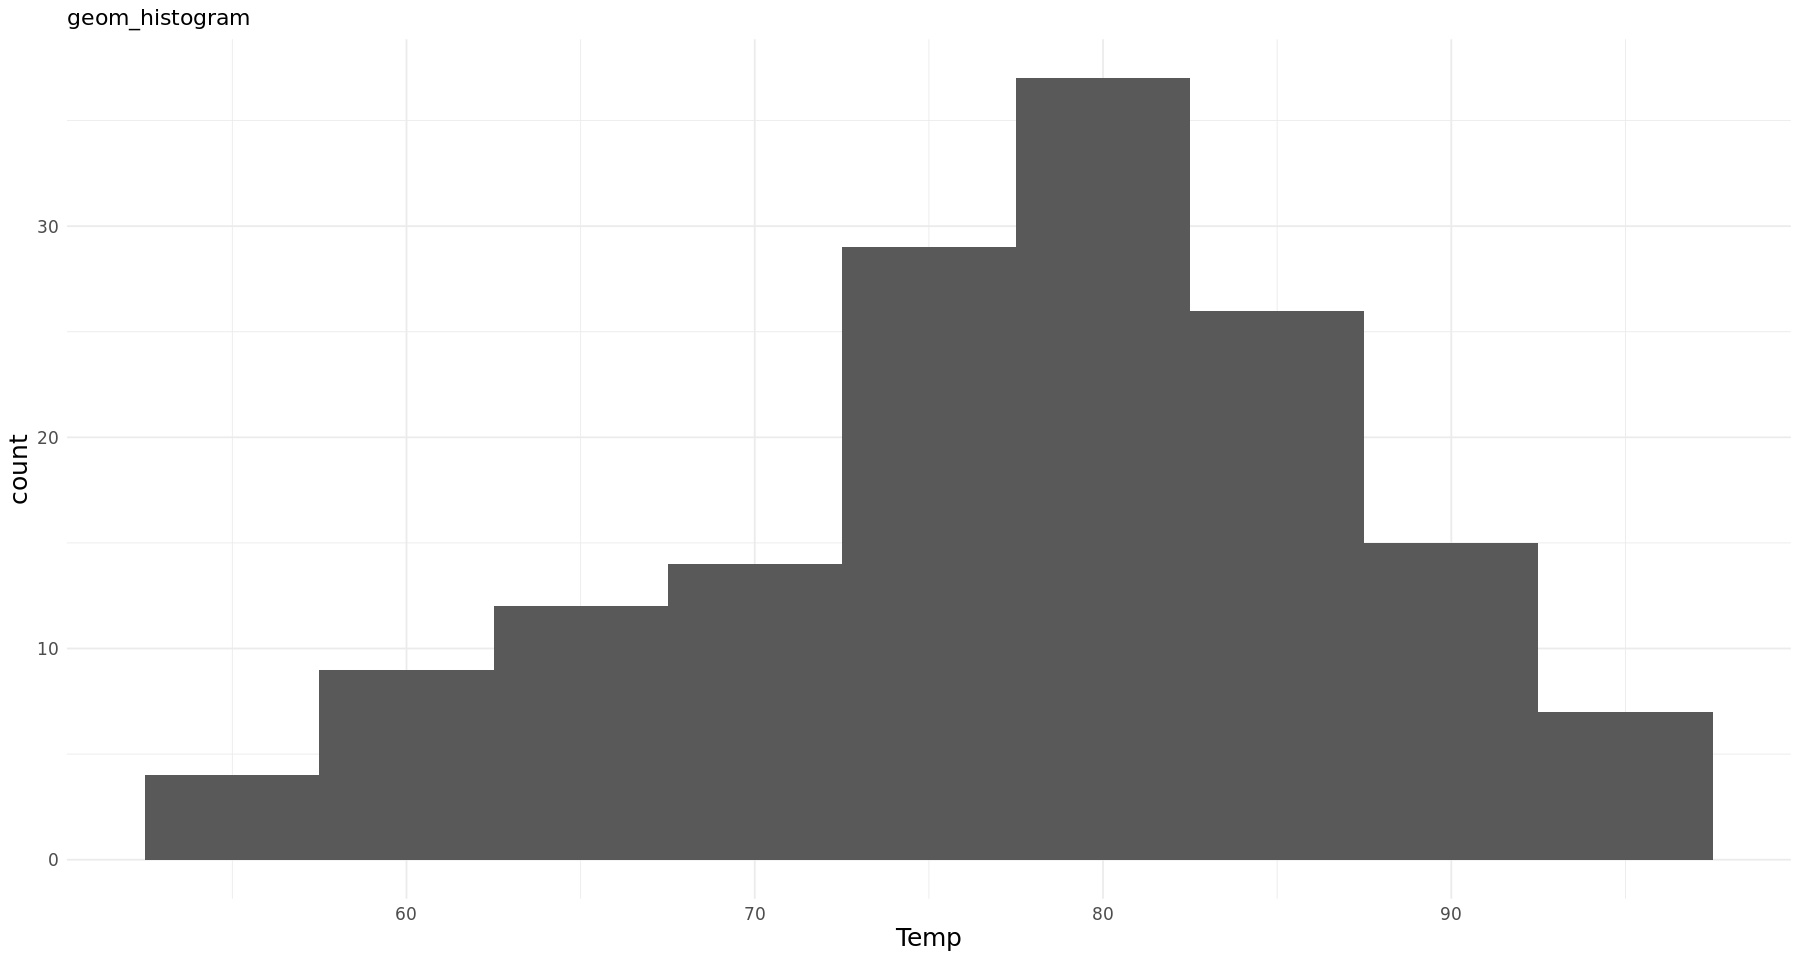

In [22]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(Temp)) +
    geom_histogram(binwidth = 5) +
    labs(title = "geom_histogram") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

It is hard to see the separation of the bins in the above visual. we can add borders around the bins using the color argument in the ***geom_histogram*** geom. In the visual below we sit the ***color*** argument to white to place a white border around the bins:

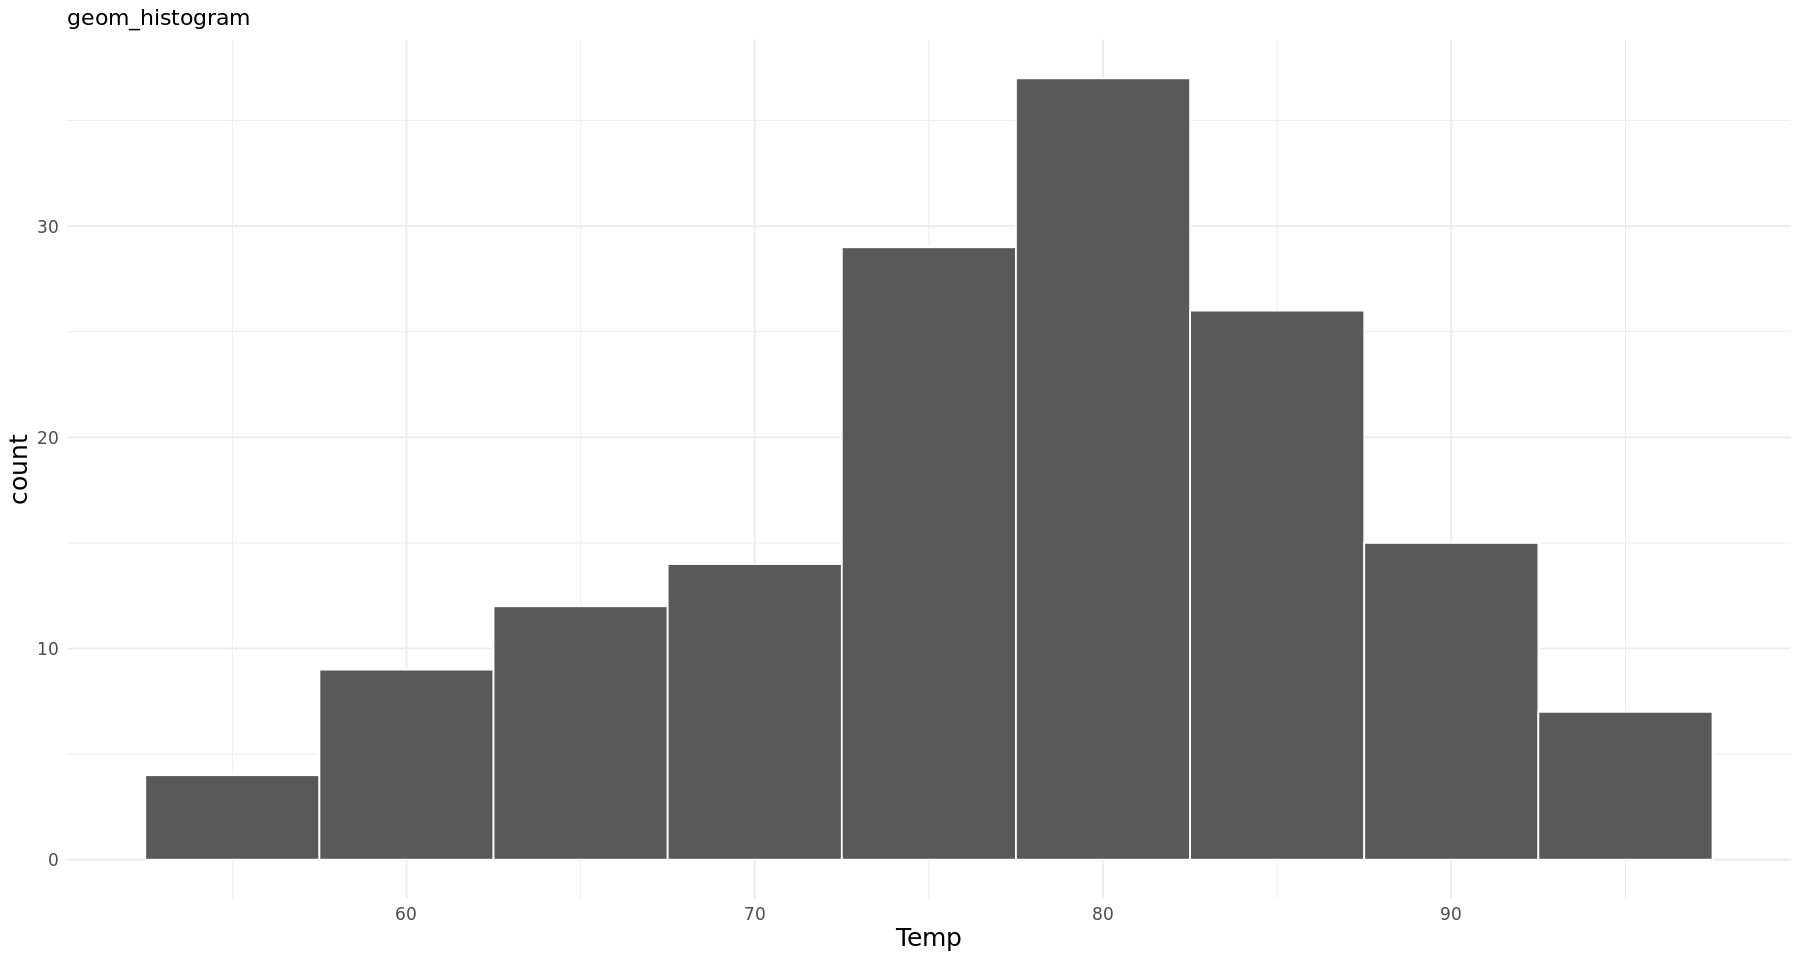

In [23]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(Temp)) +
    geom_histogram(binwidth = 5, color = "white") +
    labs(title = "geom_histogram") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))

We are not happy with the color of the bins. We can easily change that. We change the color of the bins to **pink** by settig the ***fill*** argument to **pink** as shown below:

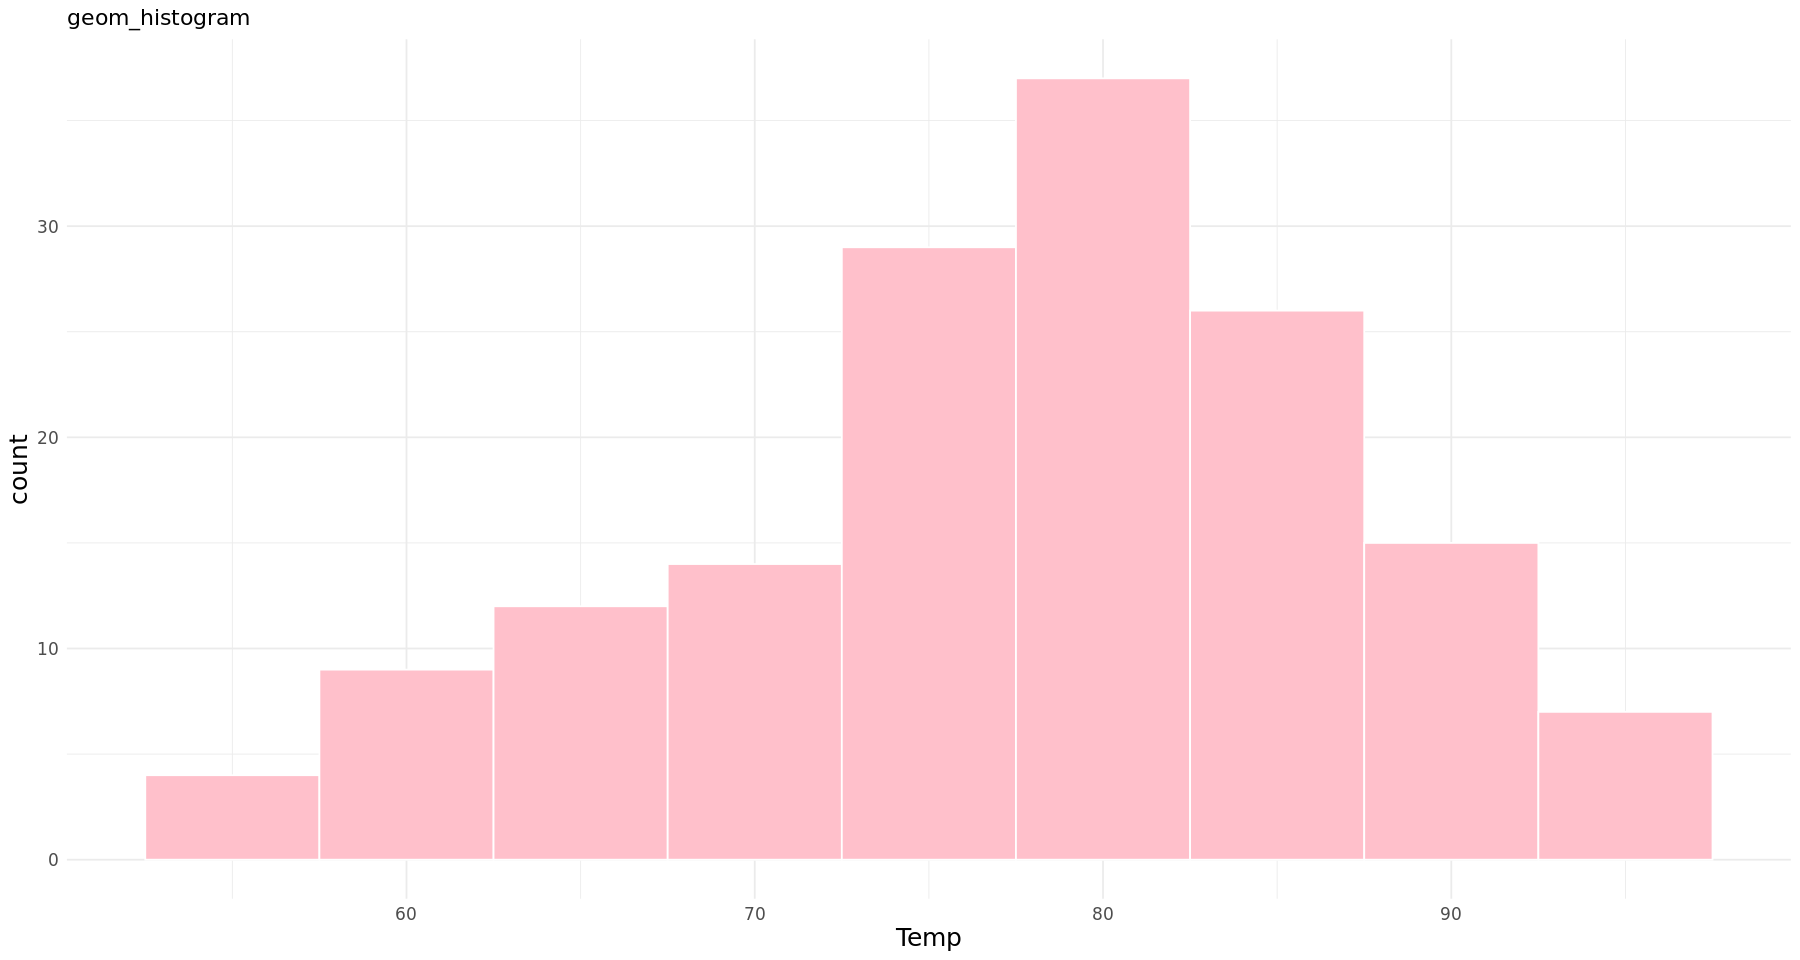

In [24]:
options(repr.plot.width=15, repr.plot.height=8)
ggplot(plot.data, aes(Temp)) +
    geom_histogram(binwidth = 5, color = "white", fill = "pink") +
    labs(title = "geom_histogram") +
    theme_minimal() +
    theme(axis.text = element_text(size=10),
        axis.title = element_text(size=15))